# Prediction Using Supervised Machine Learning

####  We are exploring Prediction using Supervised ML In this task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

#### This is a simple linear regression task as it involves only 2 variables.Here we are going to answer the question that,what will be predicted score if a student study for 9.25 hrs in a day?


#### Dataset: http://bit.ly/w-data

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('/home/wish/Downloads/student_scores.csv')
print("Given data is")
dataset

Given data is


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
dataset.isnull().sum() #No Null Values 

Hours     0
Scores    0
dtype: int64

In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


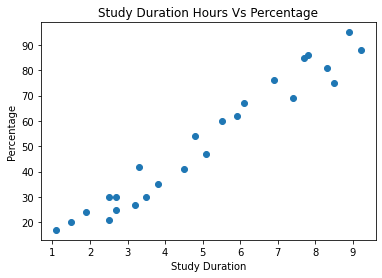

In [5]:
plt.scatter(x=dataset.Hours, y=dataset.Scores)  
plt.xlabel('Study Duration')  
plt.ylabel('Percentage')  
plt.title('Study Duration Hours Vs Percentage')  
plt.show()

##   Steps:
#### 1)Preparing Data
#### 2)Spilting data
#### 3)Modelling 
#### 4)Prediction

In [6]:
#1
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

In [7]:
print("x shape ",x.shape)
print("y shape ", y.shape)

x shape  (25, 1)
y shape  (25,)


In [8]:
#2

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [9]:
print("Shapes for")
print("x Train",x_train.shape)
print("y Train",y_train.shape)
print("x Test", x_test.shape)
print("y Test",y_test.shape)

Shapes for
x Train (20, 1)
y Train (20,)
x Test (5, 1)
y Test (5,)


In [29]:
#3

### Linerar Regression modelling

In [10]:
lreg=LinearRegression()

In [11]:
lreg.fit(x_train,y_train)

LinearRegression()

In [12]:

lreg.coef_

array([9.91065648])

In [13]:
lreg.intercept_

2.018160041434662

In [14]:
y_pred=lreg.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [30]:
#4

### what is Predicted score of student who studied for 9.25 hours ?

In [15]:

print('Ans:\nPredicted score of student who studied for 9.25 hours is\n:',lreg.predict([[9.25]]))

Ans:
Predicted score of student who studied for 9.25 hours is
: [93.69173249]


In [28]:
pd.DataFrame(np.c_[y_test,y_pred],columns=["Marks_Actual","Marks_Predicted"])

,Marks_Actual,Marks_Predicted
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


### Plotting

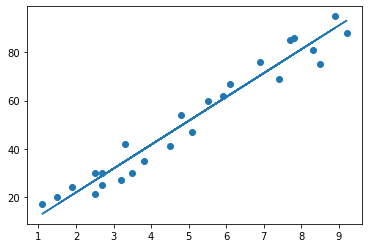

In [19]:
line = lreg.coef_*x+lreg.intercept_ #Regression line
plt.scatter(x, y) #Test data
plt.plot(x, line);
plt.show()

### Accuracy Check

In [25]:
print('Test Score  Accuracy   : ',lreg.score(x_test, y_test))
print('Training Score Accuracy : ',lreg.score(x_train, y_train))

Test Score  Accuracy   :  0.9454906892105354
Training Score Accuracy :  0.9515510725211552


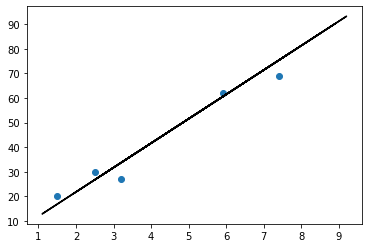

In [27]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lreg.predict(x_train),color='black')